In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 500)

df = pd.read_csv("BankChurners.csv")

import warnings
warnings.filterwarnings("ignore")


In [2]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df.shape

(10127, 23)

In [4]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

Müşteri Segmentasyonu Yapmak İçin Bazı Kolonları Çıkarıyoruz

In [5]:
df.drop(columns= ["CLIENTNUM", "Total_Relationship_Count", "Months_Inactive_12_mon", "Contacts_Count_12_mon", "Total_Revolving_Bal", "Avg_Open_To_Buy", "Total_Amt_Chng_Q4_Q1", "Total_Trans_Amt", "Total_Trans_Ct", 
                  "Total_Ct_Chng_Q4_Q1", "Avg_Utilization_Ratio", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2","Months_on_book"], inplace=True)

In [6]:
df.head(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Credit_Limit
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,12691.0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,8256.0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,3418.0
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,3313.0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,4716.0


In [7]:
df = df.rename(columns={
    'Income_Category': 'Gelir_Kategorisi',
    'Card_Category': 'Kart_Kategorisi',
    'Education_Level': 'Eğitim_Seviyesi',
    'Gender': 'Cinsiyet',
    'Customer_Age': 'Müşteri_Yaşı',
    'Credit_Limit': 'Kredi_Limiti',
    'Attrition_Flag': 'Müşteri_Terk_Durumu',
    'Marital_Status': 'Medeni_Durum',
    'Dependent_count': 'Bakmakla_Yükümlü_Olduğu_Kişi_Sayısı',
})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Müşteri_Terk_Durumu                  10127 non-null  object 
 1   Müşteri_Yaşı                         10127 non-null  int64  
 2   Cinsiyet                             10127 non-null  object 
 3   Bakmakla_Yükümlü_Olduğu_Kişi_Sayısı  10127 non-null  int64  
 4   Eğitim_Seviyesi                      10127 non-null  object 
 5   Medeni_Durum                         10127 non-null  object 
 6   Gelir_Kategorisi                     10127 non-null  object 
 7   Kart_Kategorisi                      10127 non-null  object 
 8   Kredi_Limiti                         10127 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 712.2+ KB


---

Duplicated Araştırması

In [9]:
df.loc[df.duplicated()].head()

,Müşteri_Terk_Durumu,Müşteri_Yaşı,Cinsiyet,Bakmakla_Yükümlü_Olduğu_Kişi_Sayısı,Eğitim_Seviyesi,Medeni_Durum,Gelir_Kategorisi,Kart_Kategorisi,Kredi_Limiti
2692,Existing Customer,34,F,2,Doctorate,Single,Less than $40K,Blue,1438.3
3402,Existing Customer,40,M,3,Graduate,Married,$80K - $120K,Silver,34516.0
4020,Existing Customer,56,F,1,Graduate,Married,Less than $40K,Blue,1438.3
4256,Existing Customer,52,M,2,High School,Single,$120K +,Blue,34516.0
4355,Existing Customer,50,M,3,Graduate,Married,$120K +,Blue,34516.0


Birebir aynı değerleri içeren sütunlar var mı?

In [10]:
df.T.duplicated().sum()

np.int64(0)

Farklı sütunlarda benzer değerler var ve bu gayet doğal. Birebir aynı değerleri içeren sütunlar olmadığı için verileri kaldırmıyoruz.

---

Eksik Değer NaN-Null kontrolü

In [11]:
df.isnull().sum()

Müşteri_Terk_Durumu                    0
Müşteri_Yaşı                           0
Cinsiyet                               0
Bakmakla_Yükümlü_Olduğu_Kişi_Sayısı    0
Eğitim_Seviyesi                        0
Medeni_Durum                           0
Gelir_Kategorisi                       0
Kart_Kategorisi                        0
Kredi_Limiti                           0
dtype: int64

---

Değişken Analizleri

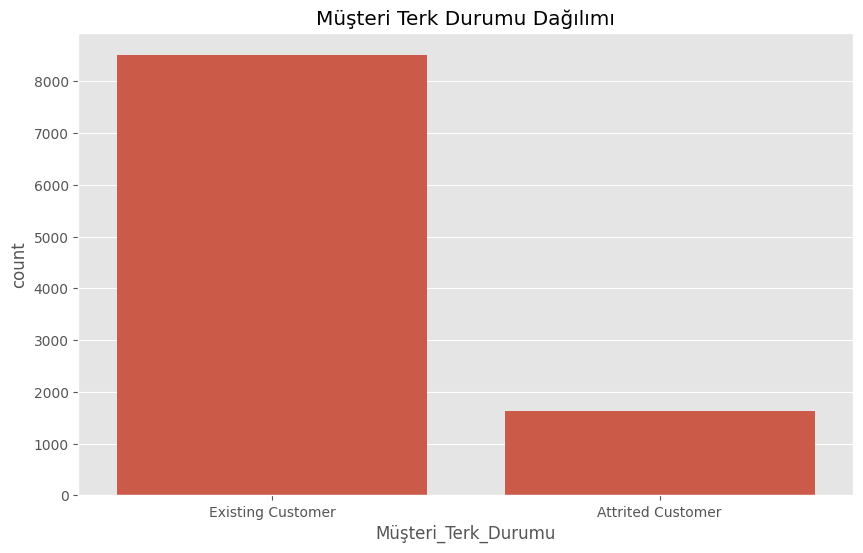

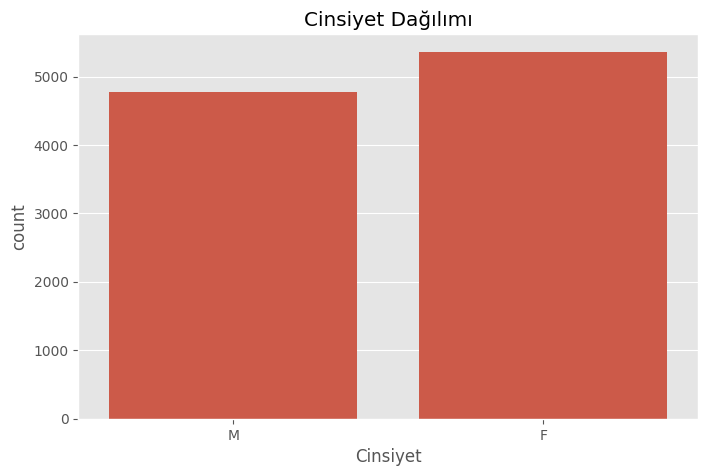

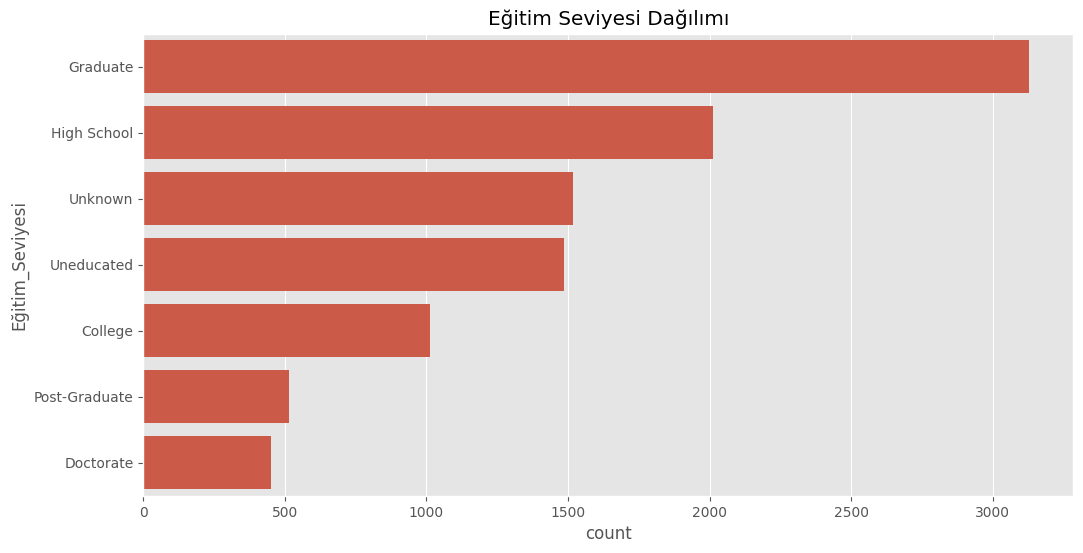

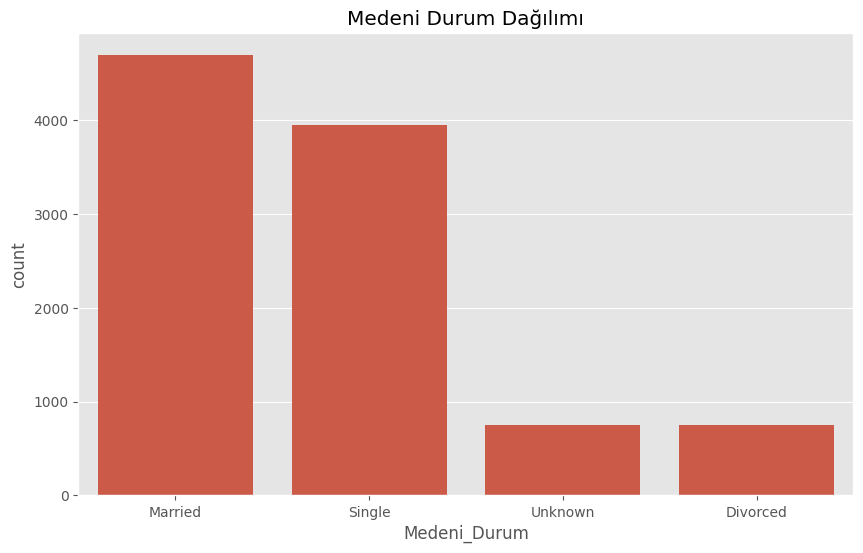

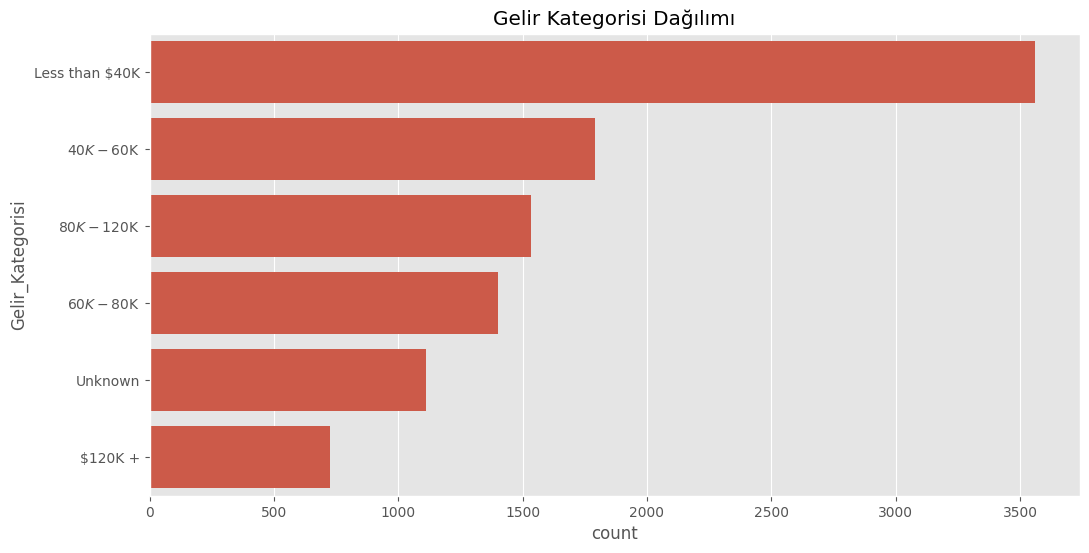

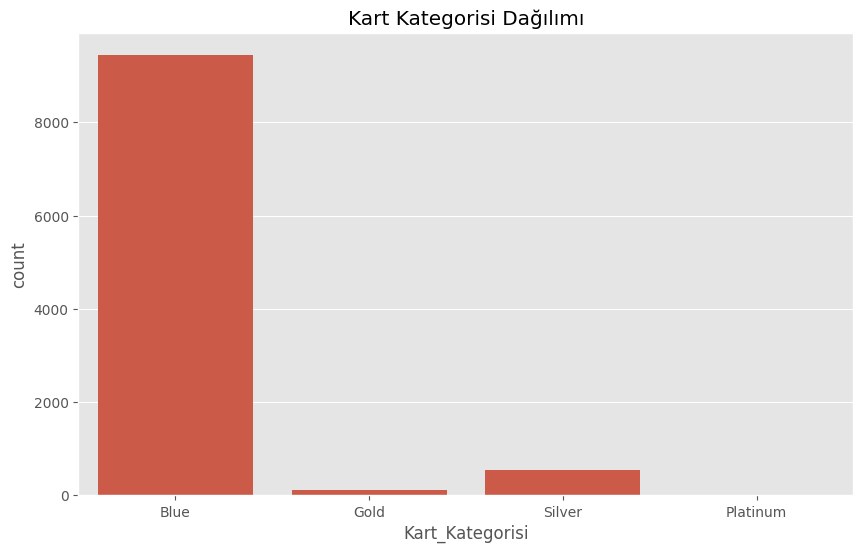

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Müşteri_Terk_Durumu')
plt.title('Müşteri Terk Durumu Dağılımı')
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Cinsiyet')
plt.title('Cinsiyet Dağılımı')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Eğitim_Seviyesi', order = df['Eğitim_Seviyesi'].value_counts().index)
plt.title('Eğitim Seviyesi Dağılımı')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Medeni_Durum')
plt.title('Medeni Durum Dağılımı')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Gelir_Kategorisi', order = df['Gelir_Kategorisi'].value_counts().index)
plt.title('Gelir Kategorisi Dağılımı')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Kart_Kategorisi')
plt.title('Kart Kategorisi Dağılımı')
plt.show()

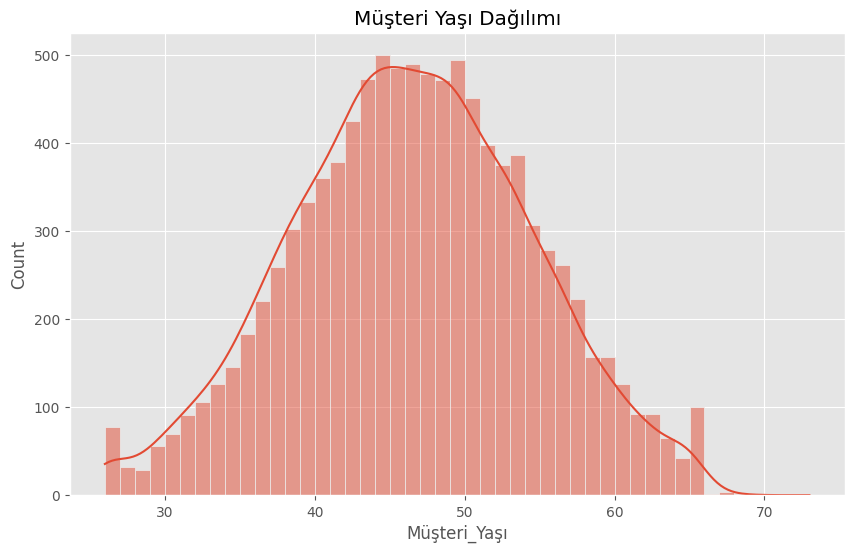

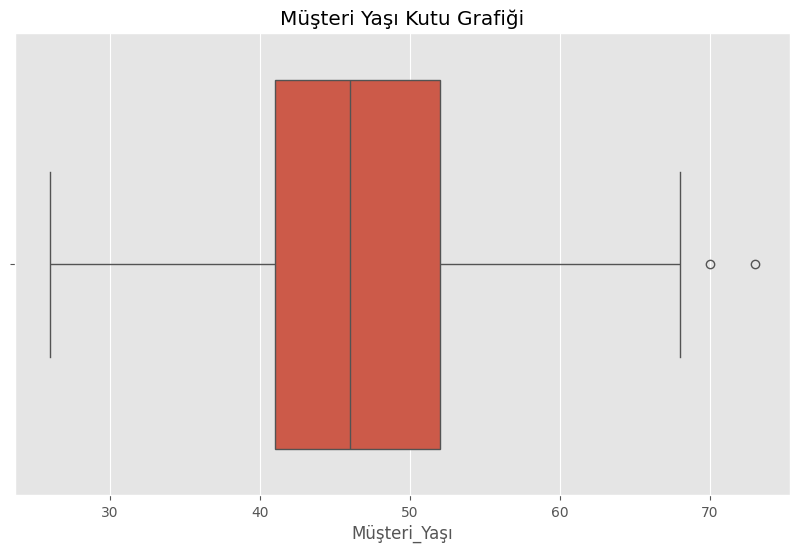

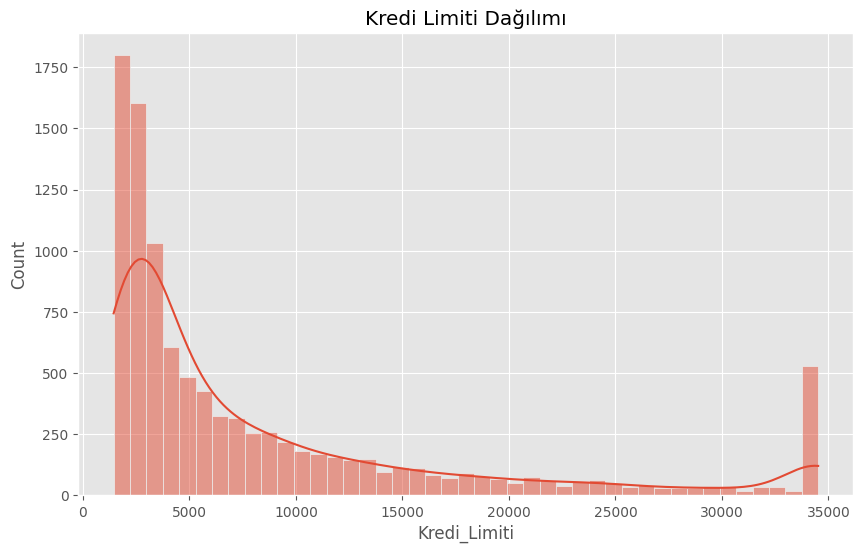

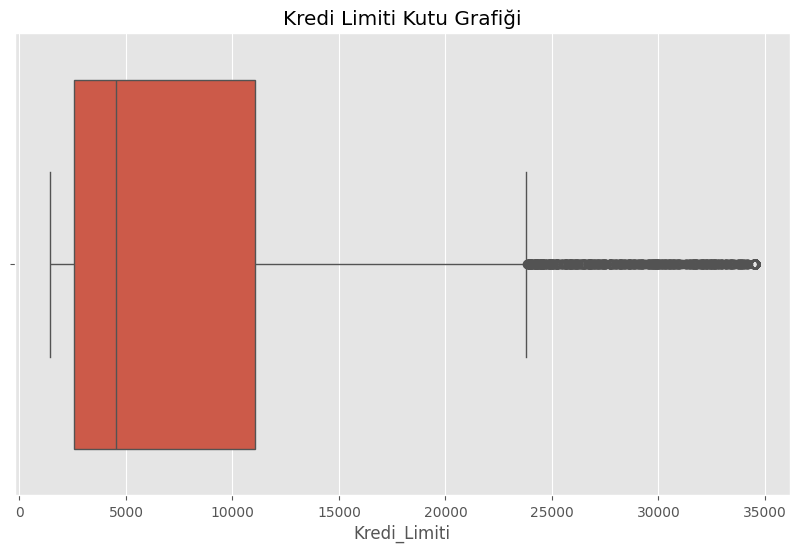

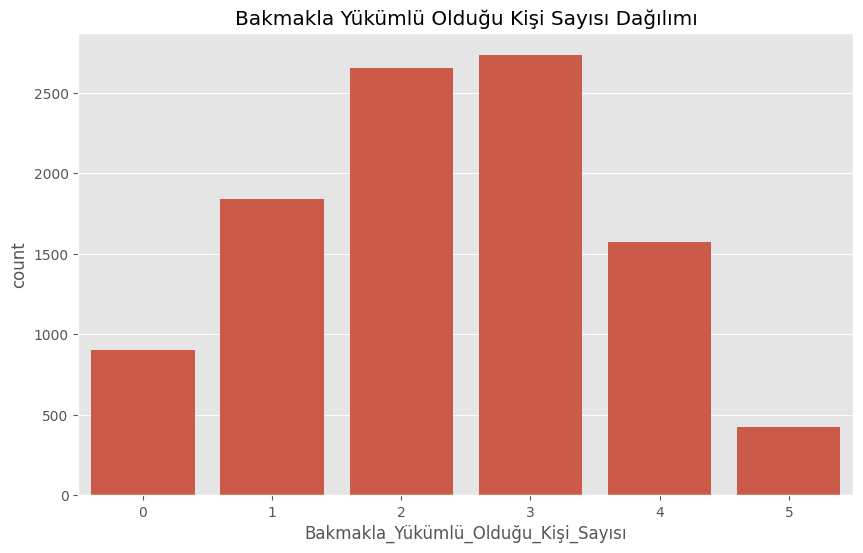

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Müşteri_Yaşı', kde=True)
plt.title('Müşteri Yaşı Dağılımı')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Müşteri_Yaşı')
plt.title('Müşteri Yaşı Kutu Grafiği')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Kredi_Limiti', kde=True)
plt.title('Kredi Limiti Dağılımı')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Kredi_Limiti')
plt.title('Kredi Limiti Kutu Grafiği')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Bakmakla_Yükümlü_Olduğu_Kişi_Sayısı')
plt.title('Bakmakla Yükümlü Olduğu Kişi Sayısı Dağılımı')
plt.show()

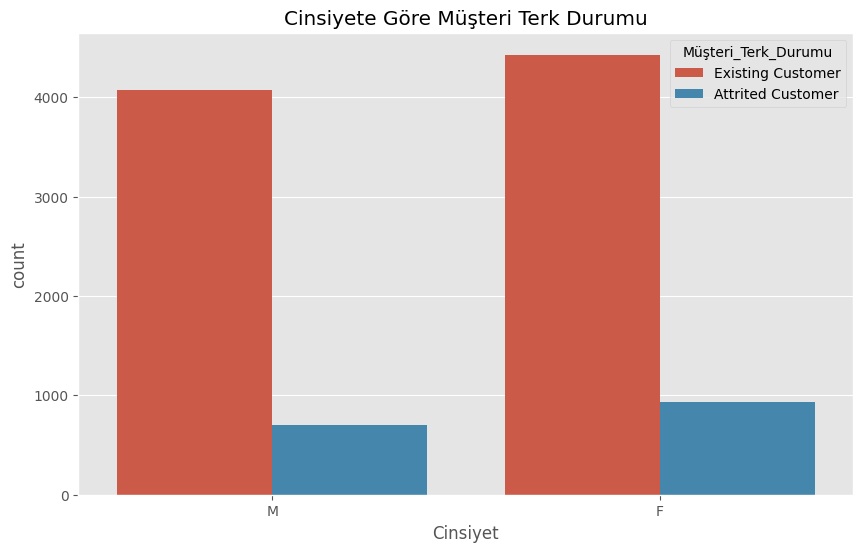

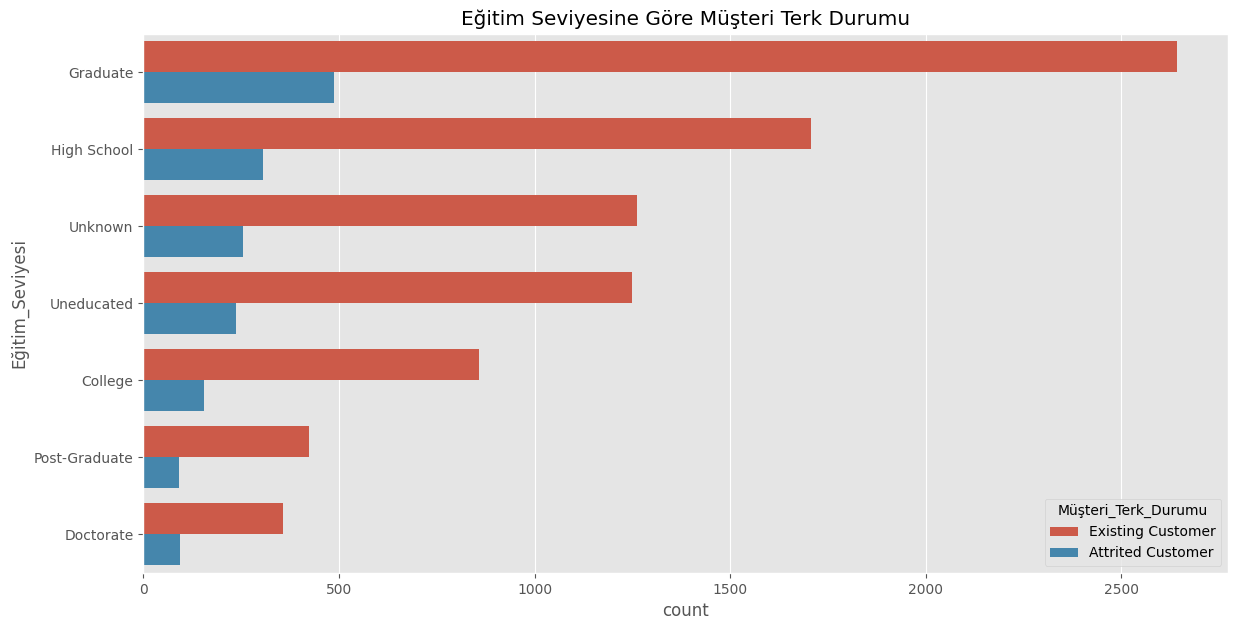

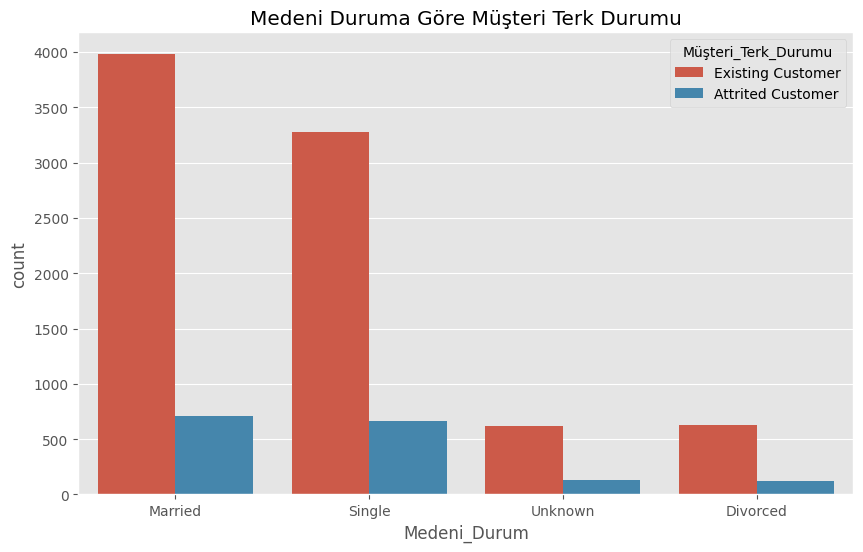

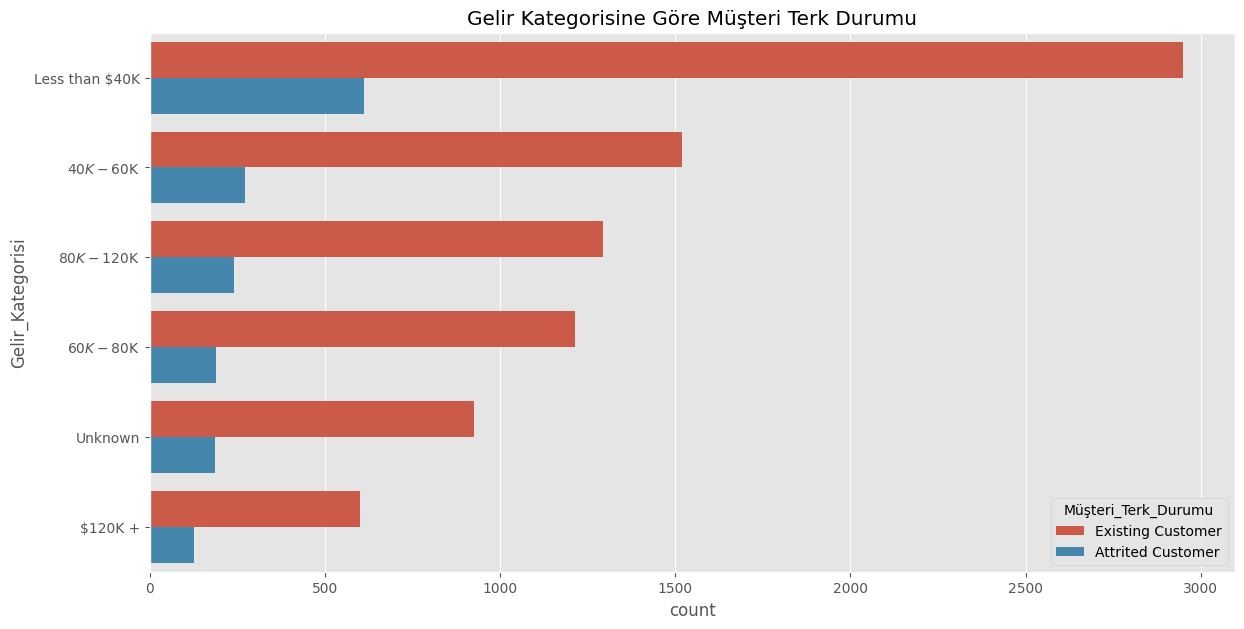

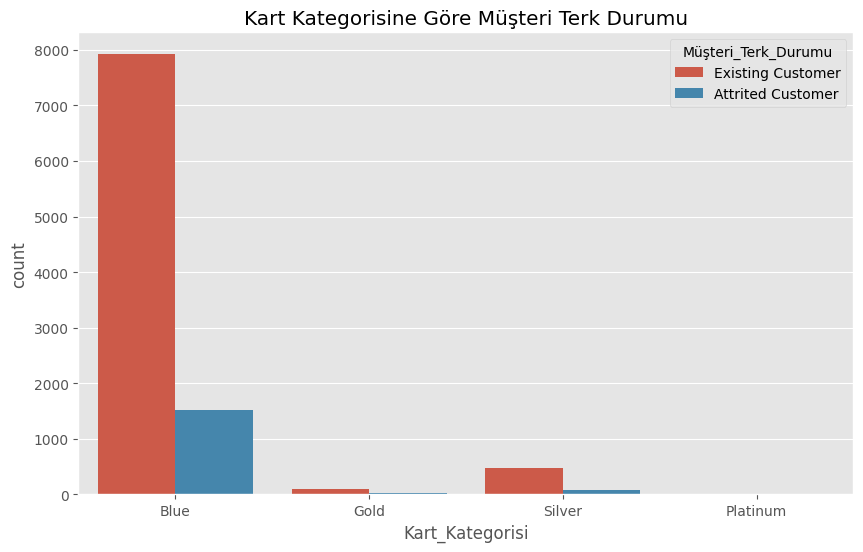

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cinsiyet', hue='Müşteri_Terk_Durumu')
plt.title('Cinsiyete Göre Müşteri Terk Durumu')
plt.show()

plt.figure(figsize=(14, 7))
sns.countplot(data=df, y='Eğitim_Seviyesi', hue='Müşteri_Terk_Durumu', order = df['Eğitim_Seviyesi'].value_counts().index)
plt.title('Eğitim Seviyesine Göre Müşteri Terk Durumu')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Medeni_Durum', hue='Müşteri_Terk_Durumu')
plt.title('Medeni Duruma Göre Müşteri Terk Durumu')
plt.show()

plt.figure(figsize=(14, 7))
sns.countplot(data=df, y='Gelir_Kategorisi', hue='Müşteri_Terk_Durumu', order = df['Gelir_Kategorisi'].value_counts().index)
plt.title('Gelir Kategorisine Göre Müşteri Terk Durumu')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Kart_Kategorisi', hue='Müşteri_Terk_Durumu')
plt.title('Kart Kategorisine Göre Müşteri Terk Durumu')
plt.show()

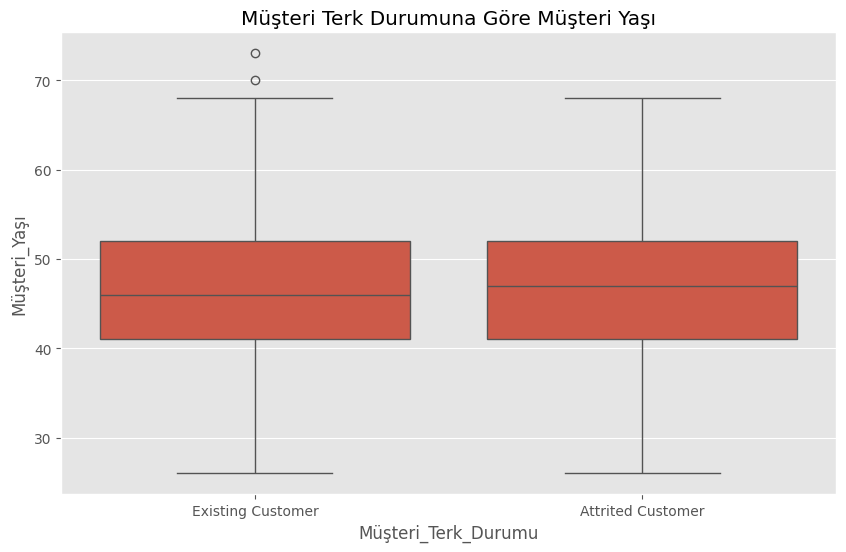

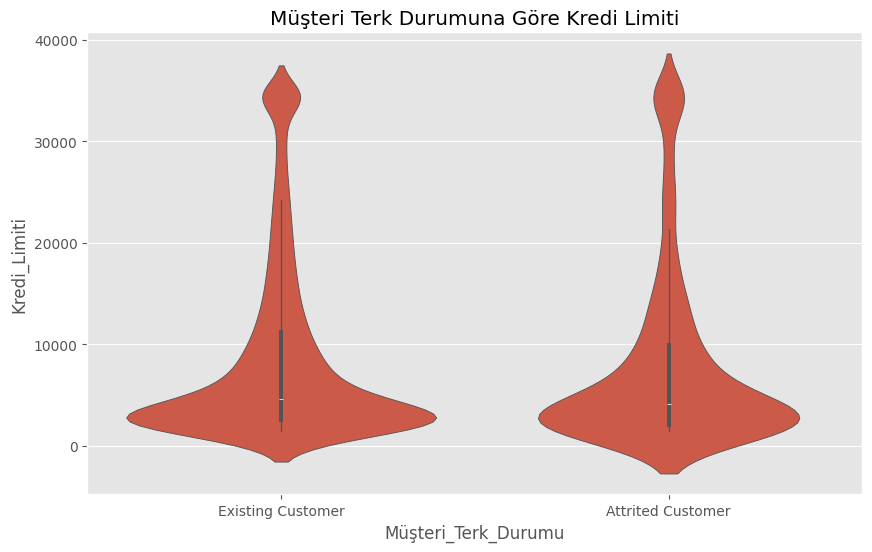

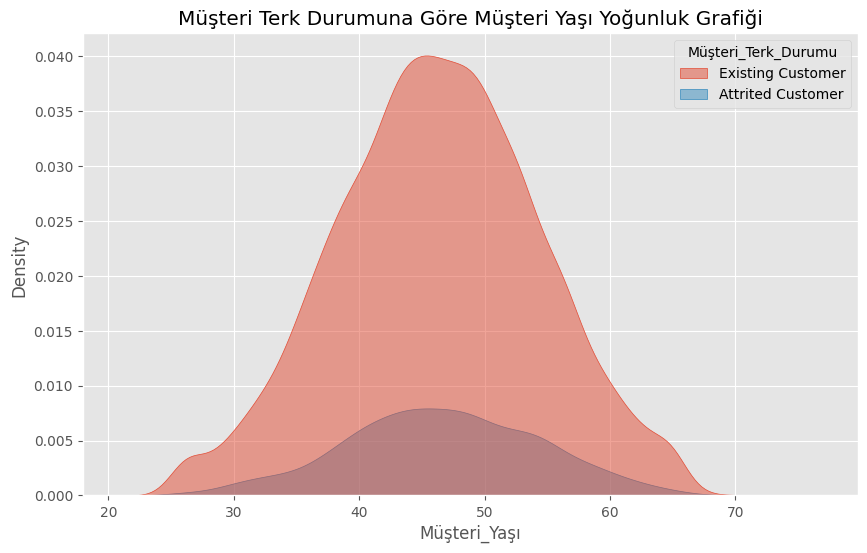

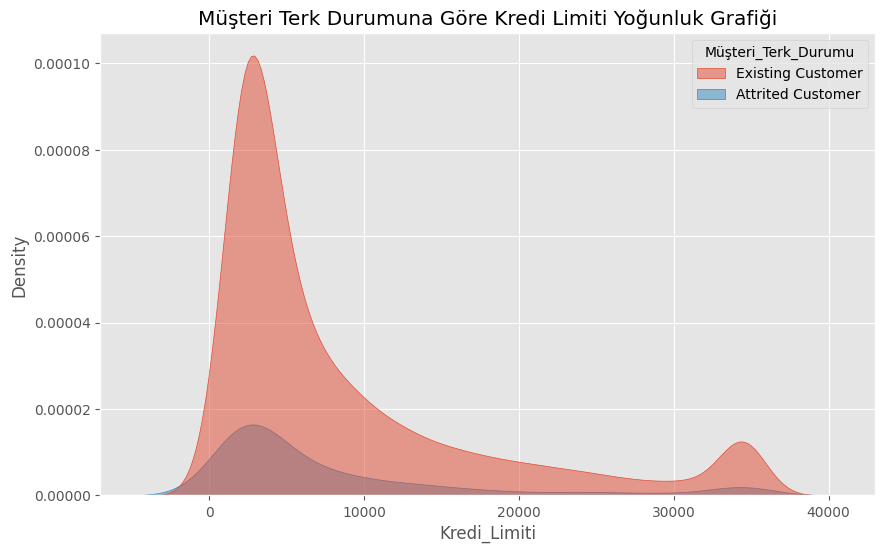

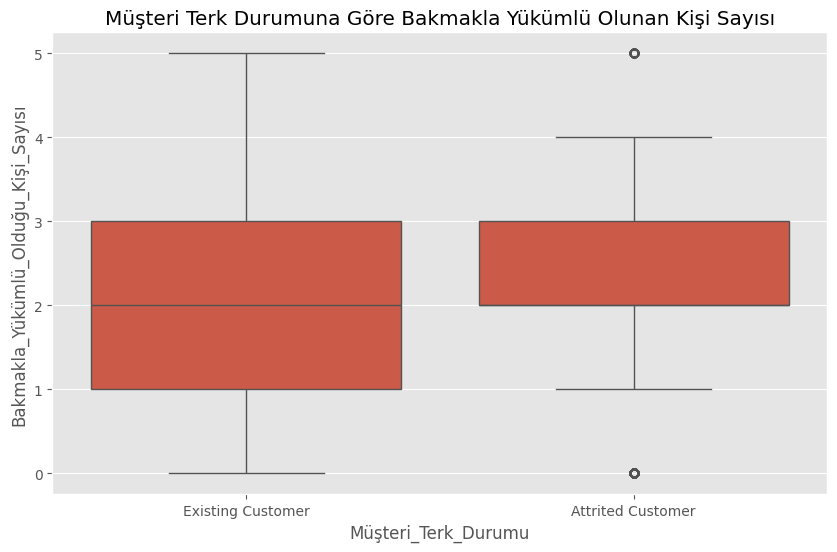

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Müşteri_Terk_Durumu', y='Müşteri_Yaşı')
plt.title('Müşteri Terk Durumuna Göre Müşteri Yaşı')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Müşteri_Terk_Durumu', y='Kredi_Limiti') # Boxplot'a benzer ama dağılımı daha detaylı gösterir
plt.title('Müşteri Terk Durumuna Göre Kredi Limiti')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Müşteri_Yaşı', hue='Müşteri_Terk_Durumu', fill=True, alpha=.5)
plt.title('Müşteri Terk Durumuna Göre Müşteri Yaşı Yoğunluk Grafiği')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Kredi_Limiti', hue='Müşteri_Terk_Durumu', fill=True, alpha=.5, warn_singular=False) # Çok farklı ölçeklerdeki veriler için warn_singular=False eklenebilir
plt.title('Müşteri Terk Durumuna Göre Kredi Limiti Yoğunluk Grafiği')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Müşteri_Terk_Durumu', y='Bakmakla_Yükümlü_Olduğu_Kişi_Sayısı')
plt.title('Müşteri Terk Durumuna Göre Bakmakla Yükümlü Olunan Kişi Sayısı')
plt.show()

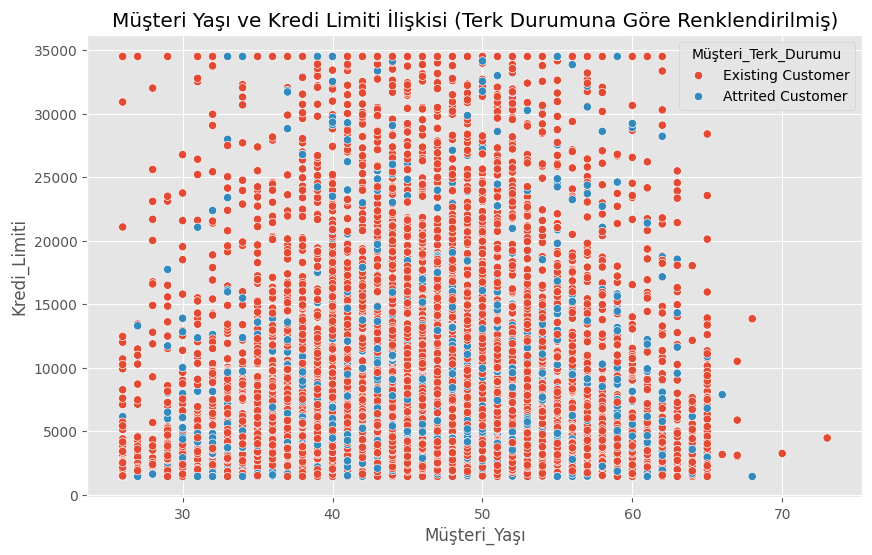

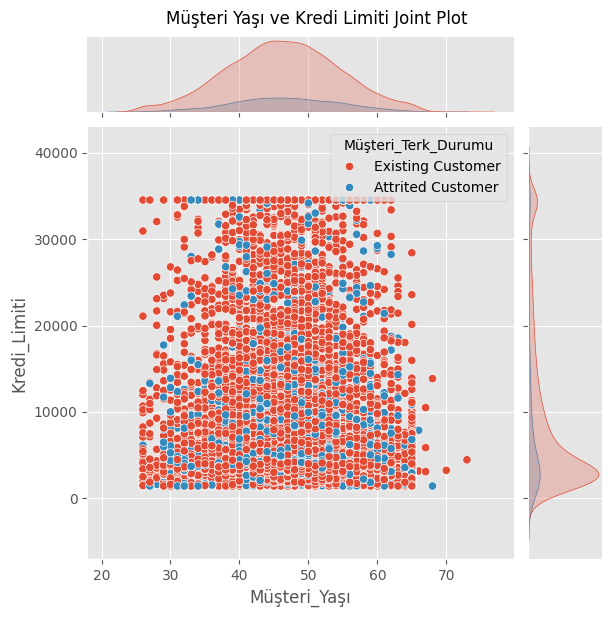

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Müşteri_Yaşı', y='Kredi_Limiti', hue='Müşteri_Terk_Durumu')
plt.title('Müşteri Yaşı ve Kredi Limiti İlişkisi (Terk Durumuna Göre Renklendirilmiş)')
plt.show()


sns.jointplot(data=df, x='Müşteri_Yaşı', y='Kredi_Limiti', hue='Müşteri_Terk_Durumu', kind='scatter')
plt.suptitle('Müşteri Yaşı ve Kredi Limiti Joint Plot', y=1.02) # Ana başlık için
plt.show()

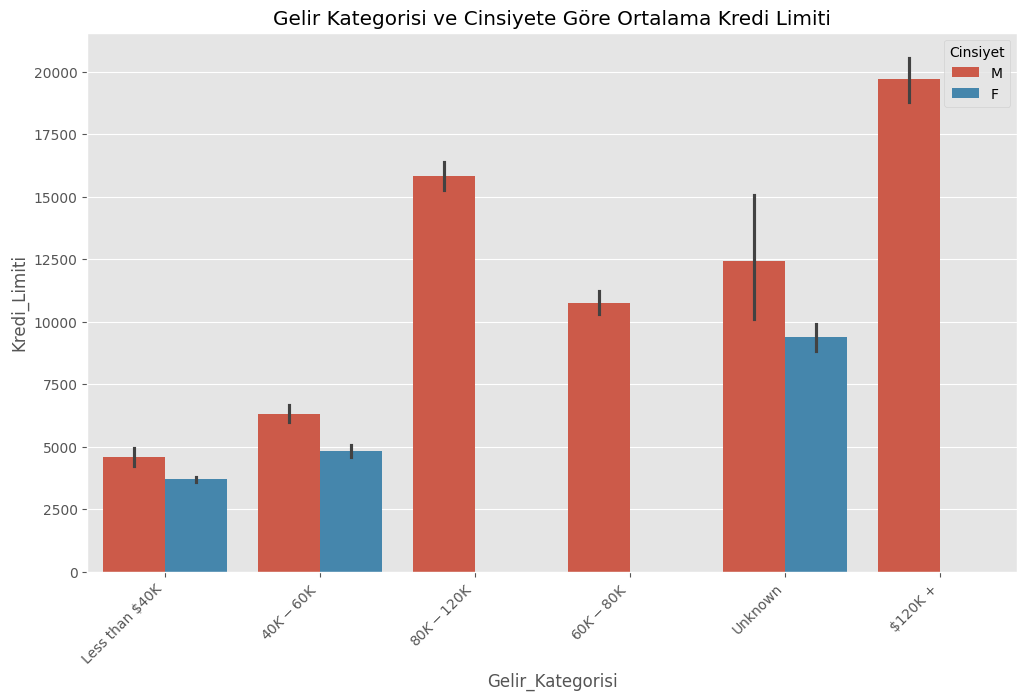

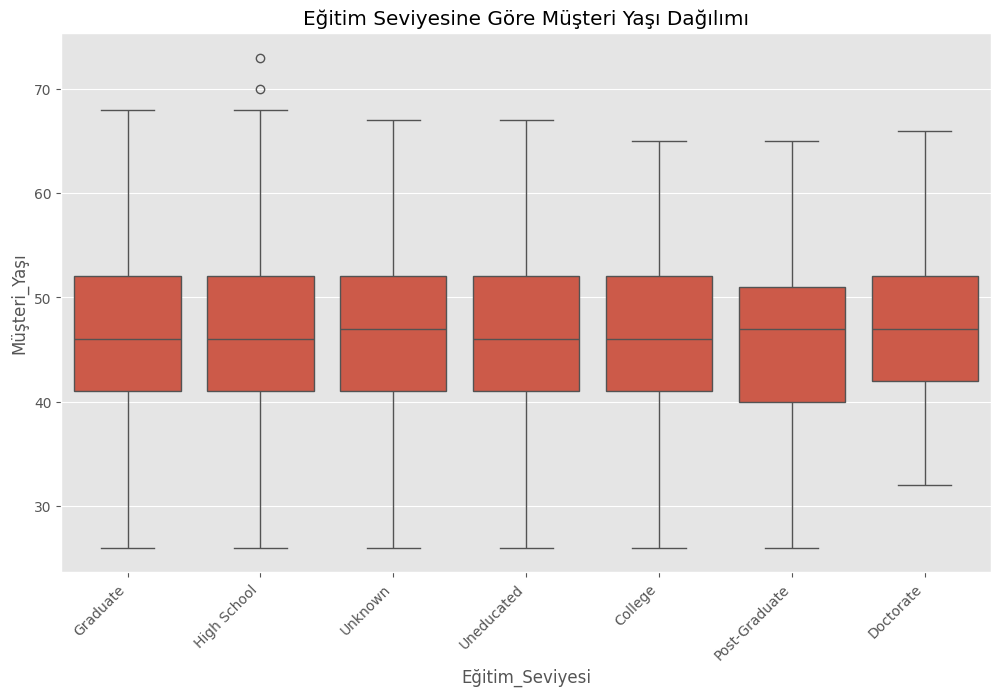

In [17]:
plt.figure(figsize=(12, 7))
sns.barplot(data=df, x='Gelir_Kategorisi', y='Kredi_Limiti', hue='Cinsiyet', order=df['Gelir_Kategorisi'].value_counts().index)
plt.title('Gelir Kategorisi ve Cinsiyete Göre Ortalama Kredi Limiti')
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Eğitim_Seviyesi', y='Müşteri_Yaşı', order=df['Eğitim_Seviyesi'].value_counts().index)
plt.title('Eğitim Seviyesine Göre Müşteri Yaşı Dağılımı')
plt.xticks(rotation=45, ha='right')
plt.show()

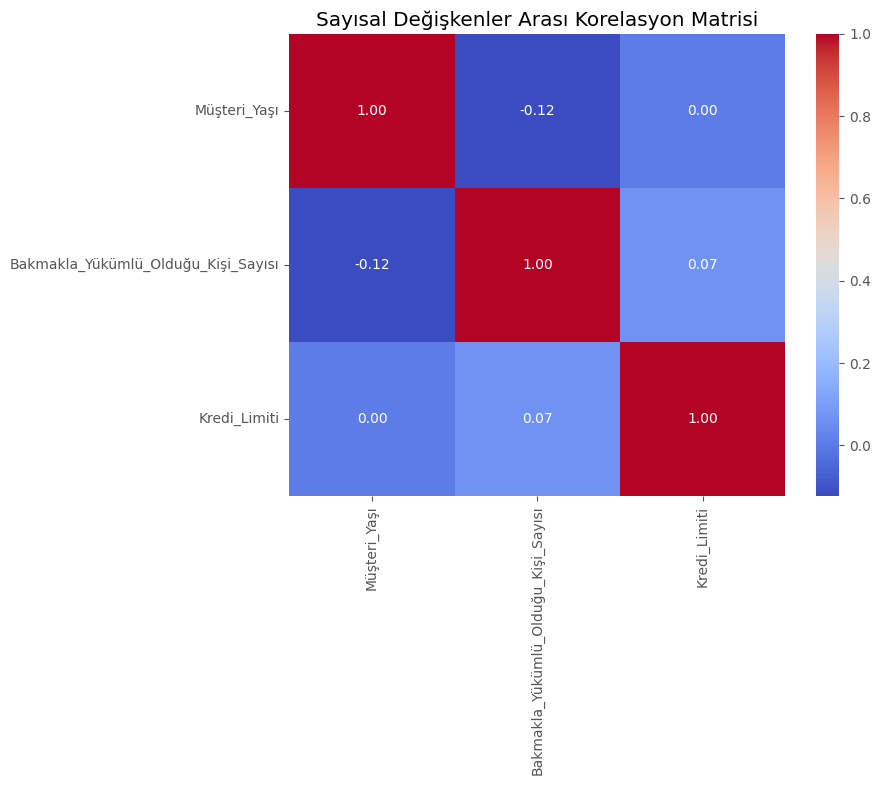

In [18]:
numerical_df = df[['Müşteri_Yaşı', 'Bakmakla_Yükümlü_Olduğu_Kişi_Sayısı', 'Kredi_Limiti']]
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Sayısal Değişkenler Arası Korelasyon Matrisi')
plt.show()

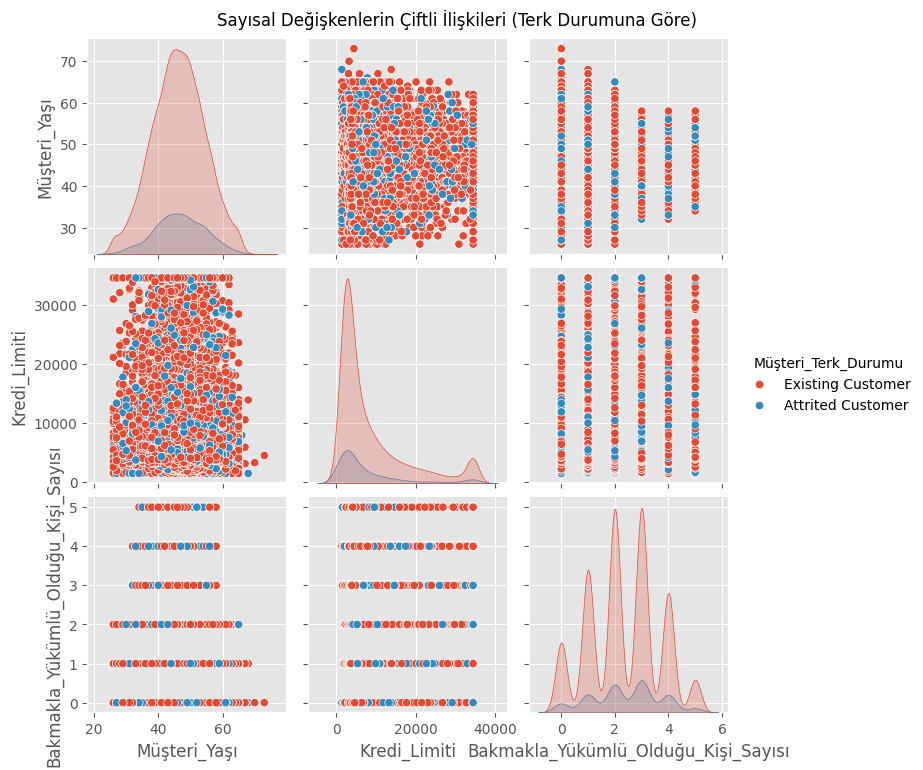

In [19]:

sns.pairplot(df[['Müşteri_Yaşı', 'Kredi_Limiti', 'Bakmakla_Yükümlü_Olduğu_Kişi_Sayısı', 'Müşteri_Terk_Durumu']], hue='Müşteri_Terk_Durumu', diag_kind='kde')
plt.suptitle('Sayısal Değişkenlerin Çiftli İlişkileri (Terk Durumuna Göre)', y=1.02)
plt.show()

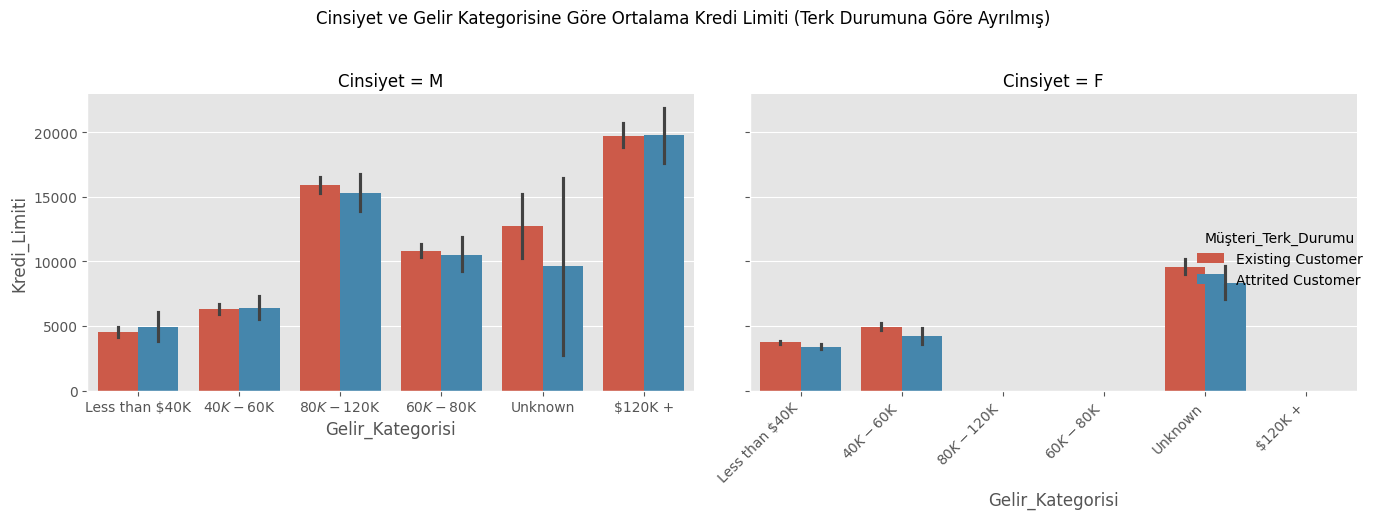

In [20]:

sns.catplot(data=df, x='Gelir_Kategorisi', y='Kredi_Limiti', hue='Müşteri_Terk_Durumu', col='Cinsiyet', kind='bar',
            order=df['Gelir_Kategorisi'].value_counts().index.tolist(), height=5, aspect=1.2)
plt.xticks(rotation=45, ha='right') 
plt.suptitle('Cinsiyet ve Gelir Kategorisine Göre Ortalama Kredi Limiti (Terk Durumuna Göre Ayrılmış)', y=1.03)
plt.tight_layout()

---

Çok sayıda Unkown değer olduğunu fark ettik. 

Bilinmeyen değerleri mode ile doldurabiliriz ve veri böylece bütünlüğünü koruruz.

In [21]:
Unknown_sayisi = df.apply(lambda x: (x == 'Unknown').sum())
Unknown_sayisi

Müşteri_Terk_Durumu                       0
Müşteri_Yaşı                              0
Cinsiyet                                  0
Bakmakla_Yükümlü_Olduğu_Kişi_Sayısı       0
Eğitim_Seviyesi                        1519
Medeni_Durum                            749
Gelir_Kategorisi                       1112
Kart_Kategorisi                           0
Kredi_Limiti                              0
dtype: int64

In [22]:
df_copy = df.copy()

In [23]:
eğitim_seviyesi_modu = df['Eğitim_Seviyesi'].mode()[0]
print(f"Eğitim Seviyesi Modu: {eğitim_seviyesi_modu}")

Eğitim Seviyesi Modu: Graduate


Bazı sütunlarda bulunan Unknown object değerde.

Mode ile doldurma işlemi yapıyoruz

In [24]:
for column in df.select_dtypes(include="object").columns:
    if (df[column] == "Unknown").any():
        mode_value = df[column][df[column] != "Unknown"].mode()[0]
        df[column] = df[column].replace("Unknown", mode_value)

print(("Kalan 'Unknown' sayısı:", (df == 'Unknown').sum().sum()))

("Kalan 'Unknown' sayısı:", np.int64(0))


İstatistiksel Bakış

In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Müşteri_Yaşı,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
Bakmakla_Yükümlü_Olduğu_Kişi_Sayısı,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
Kredi_Limiti,10127.0,8631.953698,9088.776650,1438.3,2555.0,4549.0,11067.5,34516.0


In [26]:
df["Eğitim_Seviyesi"].describe()

count        10127
unique           6
top       Graduate
freq          4647
Name: Eğitim_Seviyesi, dtype: object

Tüm Değerlerde Analiz Yapalım

In [27]:
def describe_all_columns(dataframe):
    """
    Verilen DataFrame'deki her bir sütun için .describe() metodunu çalıştırır ve sonucu yazdırır.

    Args:
        dataframe (pd.DataFrame): Tanımlayıcı istatistikleri alınacak DataFrame.
    """
    print("DataFrame Sütunlarının Tanımlayıcı İstatistikleri:\n")
    for column in dataframe.columns:
        print(f"--- {column} Sütunu ---")
        print(dataframe[column].describe())
        print("-" * 30 + "\n")

describe_all_columns(df)


DataFrame Sütunlarının Tanımlayıcı İstatistikleri:

--- Müşteri_Terk_Durumu Sütunu ---
count                 10127
unique                    2
top       Existing Customer
freq                   8500
Name: Müşteri_Terk_Durumu, dtype: object
------------------------------

--- Müşteri_Yaşı Sütunu ---
count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Müşteri_Yaşı, dtype: float64
------------------------------

--- Cinsiyet Sütunu ---
count     10127
unique        2
top           F
freq       5358
Name: Cinsiyet, dtype: object
------------------------------

--- Bakmakla_Yükümlü_Olduğu_Kişi_Sayısı Sütunu ---
count    10127.000000
mean         2.346203
std          1.298908
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: Bakmakla_Yükümlü_Olduğu_Kişi_Sayısı, dtype: float64
----------------------

Gelir Bilgisine Göre Kredi Limiti Analizi

In [28]:
df.groupby("Gelir_Kategorisi")[ "Kredi_Limiti"].agg(["mean", "count", "sum"])

,mean,count,sum
Gelir_Kategorisi,,,
$120K +,19717.322558,727,14334493.5
$40K - $60K,5462.259832,1790,9777445.1
$60K - $80K,10758.772967,1402,15083799.7
$80K - $120K,15809.890945,1535,24268182.6
Less than $40K,5125.588316,4673,23951874.2


Kart Kategorisine Göre Kredi Limiti

In [30]:
df.groupby("Kart_Kategorisi")["Kredi_Limiti"].agg(["mean", "count", "sum"])

,mean,count,sum
Kart_Kategorisi,,,
Blue,7363.780002,9436,69484628.1
Gold,28416.370690,116,3296299.0
Platinum,30283.450000,20,605669.0
Silver,25277.836036,555,14029199.0


Kart Kategorisi ve Gelir Kategorisine göre Limitler

In [31]:
df.groupby(["Kart_Kategorisi", "Gelir_Kategorisi"])["Kredi_Limiti"].agg(["mean"]).sort_values(by="mean", ascending=False)

mean
Kart_Kategorisi Gelir_Kategorisi              
Platinum        $60K - $80K       34516.000000
                $80K - $120K      34516.000000
Gold            $80K - $120K      34516.000000
Platinum        $120K +           34516.000000
Silver          $80K - $120K      34516.000000
                $120K +           34189.700000
Gold            $60K - $80K       33540.413793
                $120K +           33428.333333
Silver          $60K - $80K       29611.593750
Platinum        Less than $40K    26280.888889
                $40K - $60K       23981.000000
Gold            $40K - $60K       22401.600000
                Less than $40K    20032.030303
Silver          Less than $40K    18406.672131
Blue            $120K +           17896.647287
Silver          $40K - $60K       17457.686869
Blue            $80K - $120K      13932.575341
                $60K - $80K        8743.401964
                $40K - $60K        4590.524836
                Less than $40K     4425.779721

Müşteri Terk Durumlarının Kart Kategorisi, Gelir Kategorisi ve Kredi limitlerine göre araştırılması


In [32]:
df.groupby(by=["Müşteri_Terk_Durumu", "Kart_Kategorisi", "Gelir_Kategorisi"]).agg({"Kredi_Limiti": ["mean", "count"]})

Kredi_Limiti      
                                                              mean count
Müşteri_Terk_Durumu Kart_Kategorisi Gelir_Kategorisi                    
Attrited Customer   Blue            $120K +           18033.840708   113
                                    $40K - $60K        4365.870039   257
                                    $60K - $80K        8402.195930   172
                                    $80K - $120K      12883.150698   215
                                    Less than $40K     3912.402231   762
                    Gold            $120K +           34516.000000     2
                                    $40K - $60K       23981.000000     2
                                    $60K - $80K       34516.000000     6
                                    $80K - $120K      34516.000000     5
                                    Less than $40K    21796.500000     6
                    Platinum        $40K - $60K       23981.000000     1
                                    Less than $40K    25251.500000     4
                    Silver          $120K +           34516.000000    11
                                    $40K - $60K       15865.818182    11
                                    $60K - $80K       30064.454545    11
                                    $80K - $120K      34516.000000    22
                                    Less than $40K    17943.740741    27
Existing Customer   Blue            $120K +           17867.506579   532
                                    $40K - $60K        4631.241537  1418
                                    $60K - $80K        8796.705722  1101
                                    $80K - $120K      14123.784068  1180
                                    Less than $40K     4531.909305  3686
                    Gold            $120K +           33292.375000    16
                                    $40K - $60K       22158.615385    13
                                    $60K - $80K       33285.913043    23
                                    $80K - $120K      34516.000000    16
                                    Less than $40K    19639.925926    27
                    Platinum        $120K +           34516.000000     4
                                    $60K - $80K       34516.000000     4
                                    $80K - $120K      34516.000000     2
                                    Less than $40K    27104.400000     5
                    Silver          $120K +           34116.448980    49
                                    $40K - $60K       17656.670455    88
                                    $60K - $80K       29552.988235    85
                                    $80K - $120K      34516.000000    95
                                    Less than $40K    18486.794872   156

"Attrited Customer": Müşteri bankayı terk etti.

"Existing Customer": Müşteri hâlâ aktif.

Bankayı terk eden müşterilerin kart kategorilerini ve analizini yapalım

In [33]:
müşteri_terk = df[df['Müşteri_Terk_Durumu'] == 'Attrited Customer']
kart_kategorisine_göre_terk = müşteri_terk['Kart_Kategorisi'].value_counts()
print("Bankayı Terk Eden Müşterilerin Kart Kategorileri Dağılımı:")
print(kart_kategorisine_göre_terk)

Bankayı Terk Eden Müşterilerin Kart Kategorileri Dağılımı:
Kart_Kategorisi
Blue        1519
Silver        82
Gold          21
Platinum       5
Name: count, dtype: int64


- Blue Karta sahip olan ve en düşük gelire sahip olan 1519 müşteri bankayı terk etmiş.
- Genel terk etme çoğunluğu Blue karta sahip müşteriler arasında görülüyor.

In [34]:
müşteri_terk_gelir = df[df['Müşteri_Terk_Durumu'] == 'Attrited Customer']
gelir_kategorisine_göre_terk = müşteri_terk_gelir['Gelir_Kategorisi'].value_counts()
print("Bankayı Terk Eden Müşterilerin Gelir Kategorileri Dağılımı:")
print(gelir_kategorisine_göre_terk)

Bankayı Terk Eden Müşterilerin Gelir Kategorileri Dağılımı:
Gelir_Kategorisi
Less than $40K    799
$40K - $60K       271
$80K - $120K      242
$60K - $80K       189
$120K +           126
Name: count, dtype: int64


- Gelir kategorisi en düşük seviyede olan 799 müşteri bankayı terk etmiş.

- Bankayı terkeden müşteriler en düşük gelire sahip müşteriler.

- Müşterilerin gelirleri arttıkça banka müşterisi olarak kalma potansiyelleri yükseliyor.

In [35]:
müşteri_terk_eğitim = df[df['Müşteri_Terk_Durumu'] == 'Attrited Customer']
eğitim_kategorisine_göre_terk = müşteri_terk_eğitim['Eğitim_Seviyesi'].value_counts()
print("Bankayı Terk Eden Müşterilerin Eğitim Seviyeleri Dağılımı:")
print(eğitim_kategorisine_göre_terk)

Bankayı Terk Eden Müşterilerin Eğitim Seviyeleri Dağılımı:
Eğitim_Seviyesi
Graduate         743
High School      306
Uneducated       237
College          154
Doctorate         95
Post-Graduate     92
Name: count, dtype: int64


- Graduate (Mezun - genellikle Lisans veya Yüksek Lisans): 743 kişi
- High School (Lise): 306 kişi
- Uneducated (Eğitimsiz/Okuryazar Değil): 237 kişi
- College (Kolej/Ön Lisans/Lisans): 154 kişi
- Doctorate (Doktora): 95 kişi
- Post-Graduate (Lisansüstü - Yüksek Lisans sonrası): 9 kişi

Sonuç olarak Müşteri Terkini etkileyen durumlar :
- Düşük Gelir
- Eğitim Seviyesi
- Kart Kategoris Seviyesi

In [36]:
df.head(5)


,Müşteri_Terk_Durumu,Müşteri_Yaşı,Cinsiyet,Bakmakla_Yükümlü_Olduğu_Kişi_Sayısı,Eğitim_Seviyesi,Medeni_Durum,Gelir_Kategorisi,Kart_Kategorisi,Kredi_Limiti
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,12691.0
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,8256.0
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,3418.0
3,Existing Customer,40,F,4,High School,Married,Less than $40K,Blue,3313.0
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,4716.0


Bakmakla Yükümlü kişi sayısı analizi terk durumları

In [37]:
müşteri_terk_yükümlü = df[df['Müşteri_Terk_Durumu'] == 'Attrited Customer']

bakılan_terk_sayilari = müşteri_terk_yükümlü["Bakmakla_Yükümlü_Olduğu_Kişi_Sayısı"].value_counts()

print("Bakmakla Yükümlü Olunan Kişi Sayısına Göre Bankayı Terk Eden Müşterilerin Dağılımı:")
print(bakılan_terk_sayilari)

Bakmakla Yükümlü Olunan Kişi Sayısına Göre Bankayı Terk Eden Müşterilerin Dağılımı:
Bakmakla_Yükümlü_Olduğu_Kişi_Sayısı
3    482
2    417
1    269
4    260
0    135
5     64
Name: count, dtype: int64


Müşterinin Yaşı ile Kredi Limitlerinin Analizi

In [38]:
df.groupby(["Müşteri_Yaşı"])["Kredi_Limiti"].agg(["mean"]).sort_values(by="mean", ascending=False).head(20)

,mean
Müşteri_Yaşı,
51,10371.480905
50,9934.125221
41,9874.925594
44,9628.316800
52,9467.757181
40,9350.615512
49,9333.892727
46,9302.219592
43,9202.735095


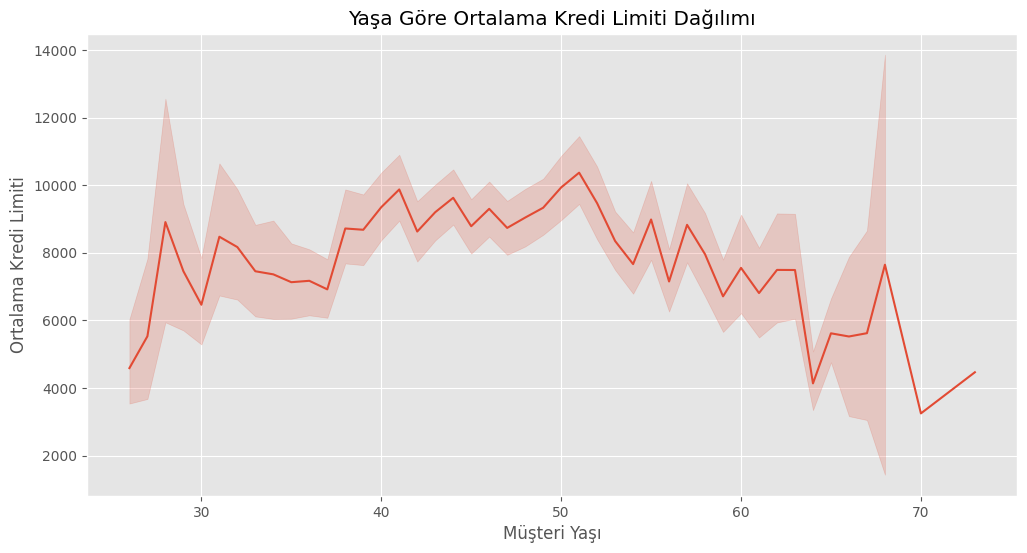

In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Müşteri_Yaşı', y='Kredi_Limiti', ci=95)
plt.title('Yaşa Göre Ortalama Kredi Limiti Dağılımı')
plt.xlabel('Müşteri Yaşı')
plt.ylabel('Ortalama Kredi Limiti')
plt.grid(True)
plt.show()

Yaş Kategorisi Oluşturuyoruz

In [40]:
df['Yaş_Kategorisi'] = pd.cut(x=df['Müşteri_Yaşı'],
                             bins=[0, 30, 40, 50, 60, 100],
                             labels=['30 ve altı', '31-40', '41-50', '51-60', '60 üzeri'],
                             include_lowest=True)

In [41]:
yaş_analizi = df.groupby('Yaş_Kategorisi').agg({
    'Müşteri_Yaşı': 'count',
    'Kredi_Limiti': ['mean', 'min', 'max', 'count']
}).round(2)


In [46]:
print(yaş_analizi)

               Müşteri_Yaşı Kredi_Limiti                       
                      count         mean     min      max count
Yaş_Kategorisi                                                 
30 ve altı              265      6278.69  1438.3  34516.0   265
31-40                  2132      8098.53  1438.3  34516.0  2132
41-50                  4652      9238.93  1438.3  34516.0  4652
51-60                  2673      8562.14  1438.3  34516.0  2673
60 üzeri                405      6468.67  1438.3  34516.0   405


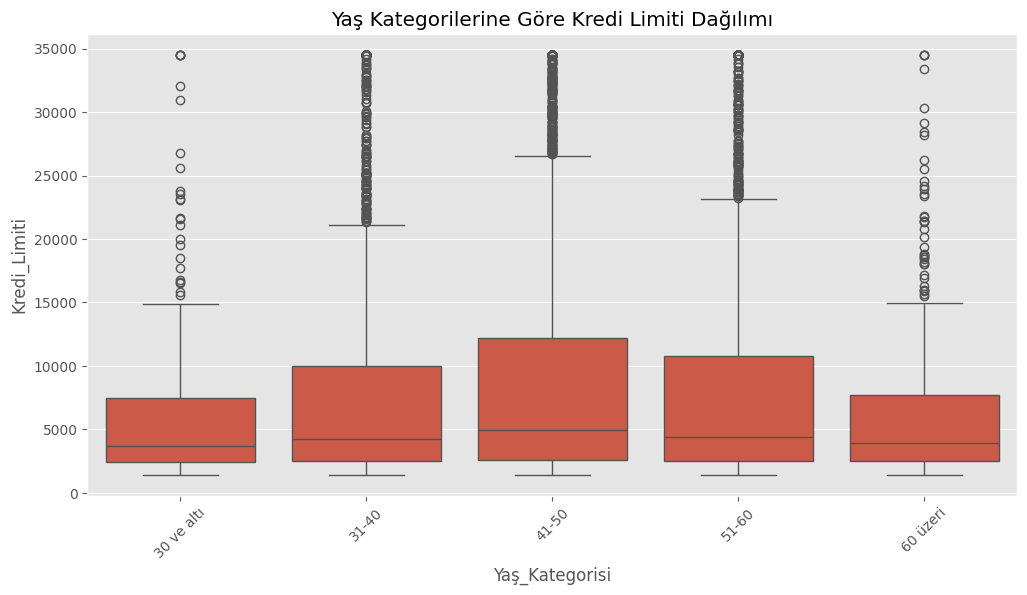

In [47]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Yaş_Kategorisi', y='Kredi_Limiti')
plt.title('Yaş Kategorilerine Göre Kredi Limiti Dağılımı')
plt.xticks(rotation=45)
plt.show()


41-50 Yaş aralığında kredi limitleri yükseliyor

---

Agregasyon İşlemlerine Başlayalım


In [48]:
agg_df = df.groupby(["Gelir_Kategorisi","Kart_Kategorisi", "Eğitim_Seviyesi","Yaş_Kategorisi","Cinsiyet"]).agg({"Kredi_Limiti": "mean"})

In [49]:
print(agg_df)

                                                                          Kredi_Limiti
Gelir_Kategorisi Kart_Kategorisi Eğitim_Seviyesi Yaş_Kategorisi Cinsiyet              
$120K +          Blue            College         30 ve altı     F                  NaN
                                                                M                  NaN
                                                 31-40          F                  NaN
                                                                M         13928.333333
                                                 41-50          F                  NaN
...                                                                                ...
Less than $40K   Silver          Uneducated      41-50          M         12685.000000
                                                 51-60          F         12592.250000
                                                                M                  NaN
                                           

Nan Değerleri Dolduracağız

In [50]:
gelir_listesi = df["Gelir_Kategorisi"].unique()
kart_listesi = df["Kart_Kategorisi"].unique()
egitim_listesi = df["Eğitim_Seviyesi"].unique()
yas_listesi = df["Yaş_Kategorisi"].unique()
cinsiyet_listesi = df["Cinsiyet"].unique()


tum_kombinasyonlar = pd.MultiIndex.from_product(
    [gelir_listesi, kart_listesi, egitim_listesi, yas_listesi, cinsiyet_listesi],
    names=["Gelir_Kategorisi","Kart_Kategorisi", "Eğitim_Seviyesi","Yaş_Kategorisi","Cinsiyet"]
)


grouped = df.groupby(["Gelir_Kategorisi","Kart_Kategorisi", "Eğitim_Seviyesi","Yaş_Kategorisi","Cinsiyet"])["Kredi_Limiti"].mean()


genel_ortalama = df["Kredi_Limiti"].mean()
go_df = grouped.reindex(tum_kombinasyonlar).fillna(genel_ortalama)


go_df = go_df.reset_index(name="Ortalama_Kredi_Limiti")


print(go_df.head())

  Gelir_Kategorisi Kart_Kategorisi Eğitim_Seviyesi Yaş_Kategorisi Cinsiyet  Ortalama_Kredi_Limiti
0      $60K - $80K            Blue     High School          41-50        M            8622.019259
1      $60K - $80K            Blue     High School          41-50        F            8631.953698
2      $60K - $80K            Blue     High School          51-60        M            7677.431343
3      $60K - $80K            Blue     High School          51-60        F            8631.953698
4      $60K - $80K            Blue     High School          31-40        M            8144.821667


In [51]:
go_df.isnull().sum()

Gelir_Kategorisi         0
Kart_Kategorisi          0
Eğitim_Seviyesi          0
Yaş_Kategorisi           0
Cinsiyet                 0
Ortalama_Kredi_Limiti    0
dtype: int64

In [52]:
go_df.columns

Index(['Gelir_Kategorisi', 'Kart_Kategorisi', 'Eğitim_Seviyesi', 'Yaş_Kategorisi', 'Cinsiyet', 'Ortalama_Kredi_Limiti'], dtype='object')

---

Müşteri Seviyeleri belirlemek için kategorileri birleştiyoruz

In [53]:
go_df["Müşteri_Seviye_Belirleme"] = go_df[['Gelir_Kategorisi', 'Kart_Kategorisi', 'Eğitim_Seviyesi', 'Yaş_Kategorisi', 'Cinsiyet']].agg("_".join, axis=1)

In [54]:
go_df.head()

,Gelir_Kategorisi,Kart_Kategorisi,Eğitim_Seviyesi,Yaş_Kategorisi,Cinsiyet,Ortalama_Kredi_Limiti,Müşteri_Seviye_Belirleme
0,$60K - $80K,Blue,High School,41-50,M,8622.019259,$60K - $80K_Blue_High School_41-50_M
1,$60K - $80K,Blue,High School,41-50,F,8631.953698,$60K - $80K_Blue_High School_41-50_F
2,$60K - $80K,Blue,High School,51-60,M,7677.431343,$60K - $80K_Blue_High School_51-60_M
3,$60K - $80K,Blue,High School,51-60,F,8631.953698,$60K - $80K_Blue_High School_51-60_F
4,$60K - $80K,Blue,High School,31-40,M,8144.821667,$60K - $80K_Blue_High School_31-40_M


In [55]:
segment = go_df[["Müşteri_Seviye_Belirleme", "Ortalama_Kredi_Limiti"]]

In [56]:
segment.head()

,Müşteri_Seviye_Belirleme,Ortalama_Kredi_Limiti
0,$60K - $80K_Blue_High School_41-50_M,8622.019259
1,$60K - $80K_Blue_High School_41-50_F,8631.953698
2,$60K - $80K_Blue_High School_51-60_M,7677.431343
3,$60K - $80K_Blue_High School_51-60_F,8631.953698
4,$60K - $80K_Blue_High School_31-40_M,8144.821667


In [57]:
segment = segment.groupby("Müşteri_Seviye_Belirleme").agg({"Ortalama_Kredi_Limiti": "mean"})

In [58]:
segment.reset_index(inplace=True)

In [59]:
segment["Müşteri_Seviye_Belirleme"].value_counts()

Müşteri_Seviye_Belirleme
Less than $40K_Silver_Post-Graduate_31-40_M         1
Less than $40K_Silver_Post-Graduate_31-40_F         1
Less than $40K_Silver_Post-Graduate_30 ve altı_M    1
Less than $40K_Silver_Post-Graduate_30 ve altı_F    1
Less than $40K_Silver_High School_60 üzeri_M        1
                                                   ..
$120K +_Blue_College_41-50_F                        1
$120K +_Blue_College_31-40_M                        1
$120K +_Blue_College_31-40_F                        1
$120K +_Blue_College_30 ve altı_M                   1
$120K +_Blue_College_30 ve altı_F                   1
Name: count, Length: 1200, dtype: int64

In [60]:
segment["Müşteri_Segmenti"] = pd.cut(
    segment["Ortalama_Kredi_Limiti"],
    bins=4,
    labels=["D", "C", "B", "A"]
)

In [61]:
segment.head()

,Müşteri_Seviye_Belirleme,Ortalama_Kredi_Limiti,Müşteri_Segmenti
0,$120K +_Blue_College_30 ve altı_F,8631.953698,D
1,$120K +_Blue_College_30 ve altı_M,8631.953698,D
2,$120K +_Blue_College_31-40_F,8631.953698,D
3,$120K +_Blue_College_31-40_M,13928.333333,C
4,$120K +_Blue_College_41-50_F,8631.953698,D


In [62]:
segment.groupby("Müşteri_Segmenti").agg({"Ortalama_Kredi_Limiti" : "mean"})

,Ortalama_Kredi_Limiti
Müşteri_Segmenti,
D,8127.598206
C,14742.617168
B,21597.482035
A,33605.406451


In [63]:
segment.sort_values(by="Ortalama_Kredi_Limiti", ascending=False).head(10).reset_index(drop=True)

,Müşteri_Seviye_Belirleme,Ortalama_Kredi_Limiti,Müşteri_Segmenti
0,$80K - $120K_Gold_Graduate_41-50_M,34516.0,A
1,$80K - $120K_Gold_Graduate_51-60_M,34516.0,A
2,$80K - $120K_Silver_Graduate_51-60_M,34516.0,A
3,$80K - $120K_Silver_Uneducated_31-40_M,34516.0,A
4,$80K - $120K_Silver_Uneducated_41-50_M,34516.0,A
5,$80K - $120K_Silver_Uneducated_51-60_M,34516.0,A
6,$80K - $120K_Silver_High School_31-40_M,34516.0,A
7,$80K - $120K_Silver_Doctorate_31-40_M,34516.0,A
8,$80K - $120K_Silver_Post-Graduate_31-40_M,34516.0,A
9,$80K - $120K_Silver_High School_51-60_M,34516.0,A


Artık yeni müşteri oluşturup segmentini ve kredi limitini belirleyebiliriz

In [64]:
yeni_musteri = "$80K - $120K_Silver_High School_51-60_M"

In [65]:
segment[segment["Müşteri_Seviye_Belirleme"] == yeni_musteri]

,Müşteri_Seviye_Belirleme,Ortalama_Kredi_Limiti,Müşteri_Segmenti
937,$80K - $120K_Silver_High School_51-60_M,34516.0,A


In [67]:
segment.to_csv("Müşteri_Segmentasyonu.csv", index=False)